<h1 style="color: #FF6347;">Machine Learning Fine-Tuning</h1>

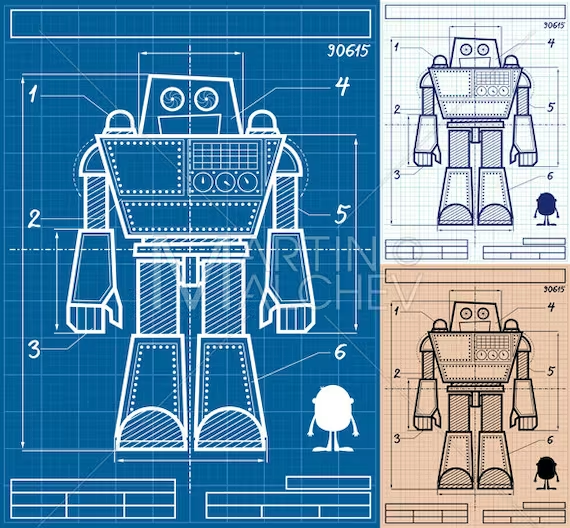

In [ ]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #FF8C00;">Data Extraction</h2>

In [ ]:
data = pd.read_csv('train.csv')
data.set_index('PassengerId', inplace=True)
snake_columns(data)
df = data.copy()

## Overview
The goal is to predict survival on the Titanic, where `survived` is the target variable indicating if a passenger survived or not. The dataset includes various features related to the passengers.

## Target Variable
- **`survived`**: Indicates if a passenger survived the Titanic disaster.
  - `0` = No, the passenger did not survive.
  - `1` = Yes, the passenger survived.

## Features
The following features are included in the dataset and are used to predict the target variable:

- **`Pclass`**: Ticket class, a proxy for socio-economic status (SES)
  - `1` = 1st Class (Upper)
  - `2` = 2nd Class (Middle)
  - `3` = 3rd Class (Lower)

- **`Name`**: Passenger's name. It includes titles and sometimes family names, which can be used for feature engineering.

- **`Sex`**: Passenger's sex. 
  - `male`
  - `female`

- **`Age`**: Age in years. It is fractional if less than 1 and estimated as xx.5 if it's estimated.

- **`SibSp`**: Number of siblings or spouses aboard the Titanic. Defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **`Parch`**: Number of parents or children aboard the Titanic. Defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore Parch=0 for them.

- **`Ticket`**: Ticket number. The format varies, and it might contain letters and numbers.

- **`Fare`**: Passenger fare. It varies depending on class, embarkation point, and sometimes other factors.

- **`Cabin`**: Cabin number. The format varies, and cabins might be shared among passengers.

- **`Embarked`**: Port of Embarkation. Indicates where the passenger boarded the Titanic.
  - `C` = Cherbourg
  - `Q` = Queenstown
  - `S` = Southampton

<h2 style="color: #FF8C00;">Data Cleaning</h2>

In [ ]:
df.isnull().sum()

<h1 style="color: #FF8C00;">Data Preprocessing</h1>

<h1 style="color: #FF8C00;">Feature Extraction </h1>

<h2 style="color: #FF6347;">Feature Extraction: Cabins</h2>

- **`Cabin`**: Cabin number. The format varies, and cabins might be shared among passengers.

In [ ]:
print(str(round(df.cabin.isna().sum() / len(df) * 100, 2)) + "% of NaNs in Cabin Column")

- There are many missing values, but we must use the stateroom variable because it can be an important predictor. 
- As you can see in the picture below, first class had cabins on deck A, B, or C, a mix was on deck D or E, and third class was mostly on f or g. We can identify the cover by the first letter.

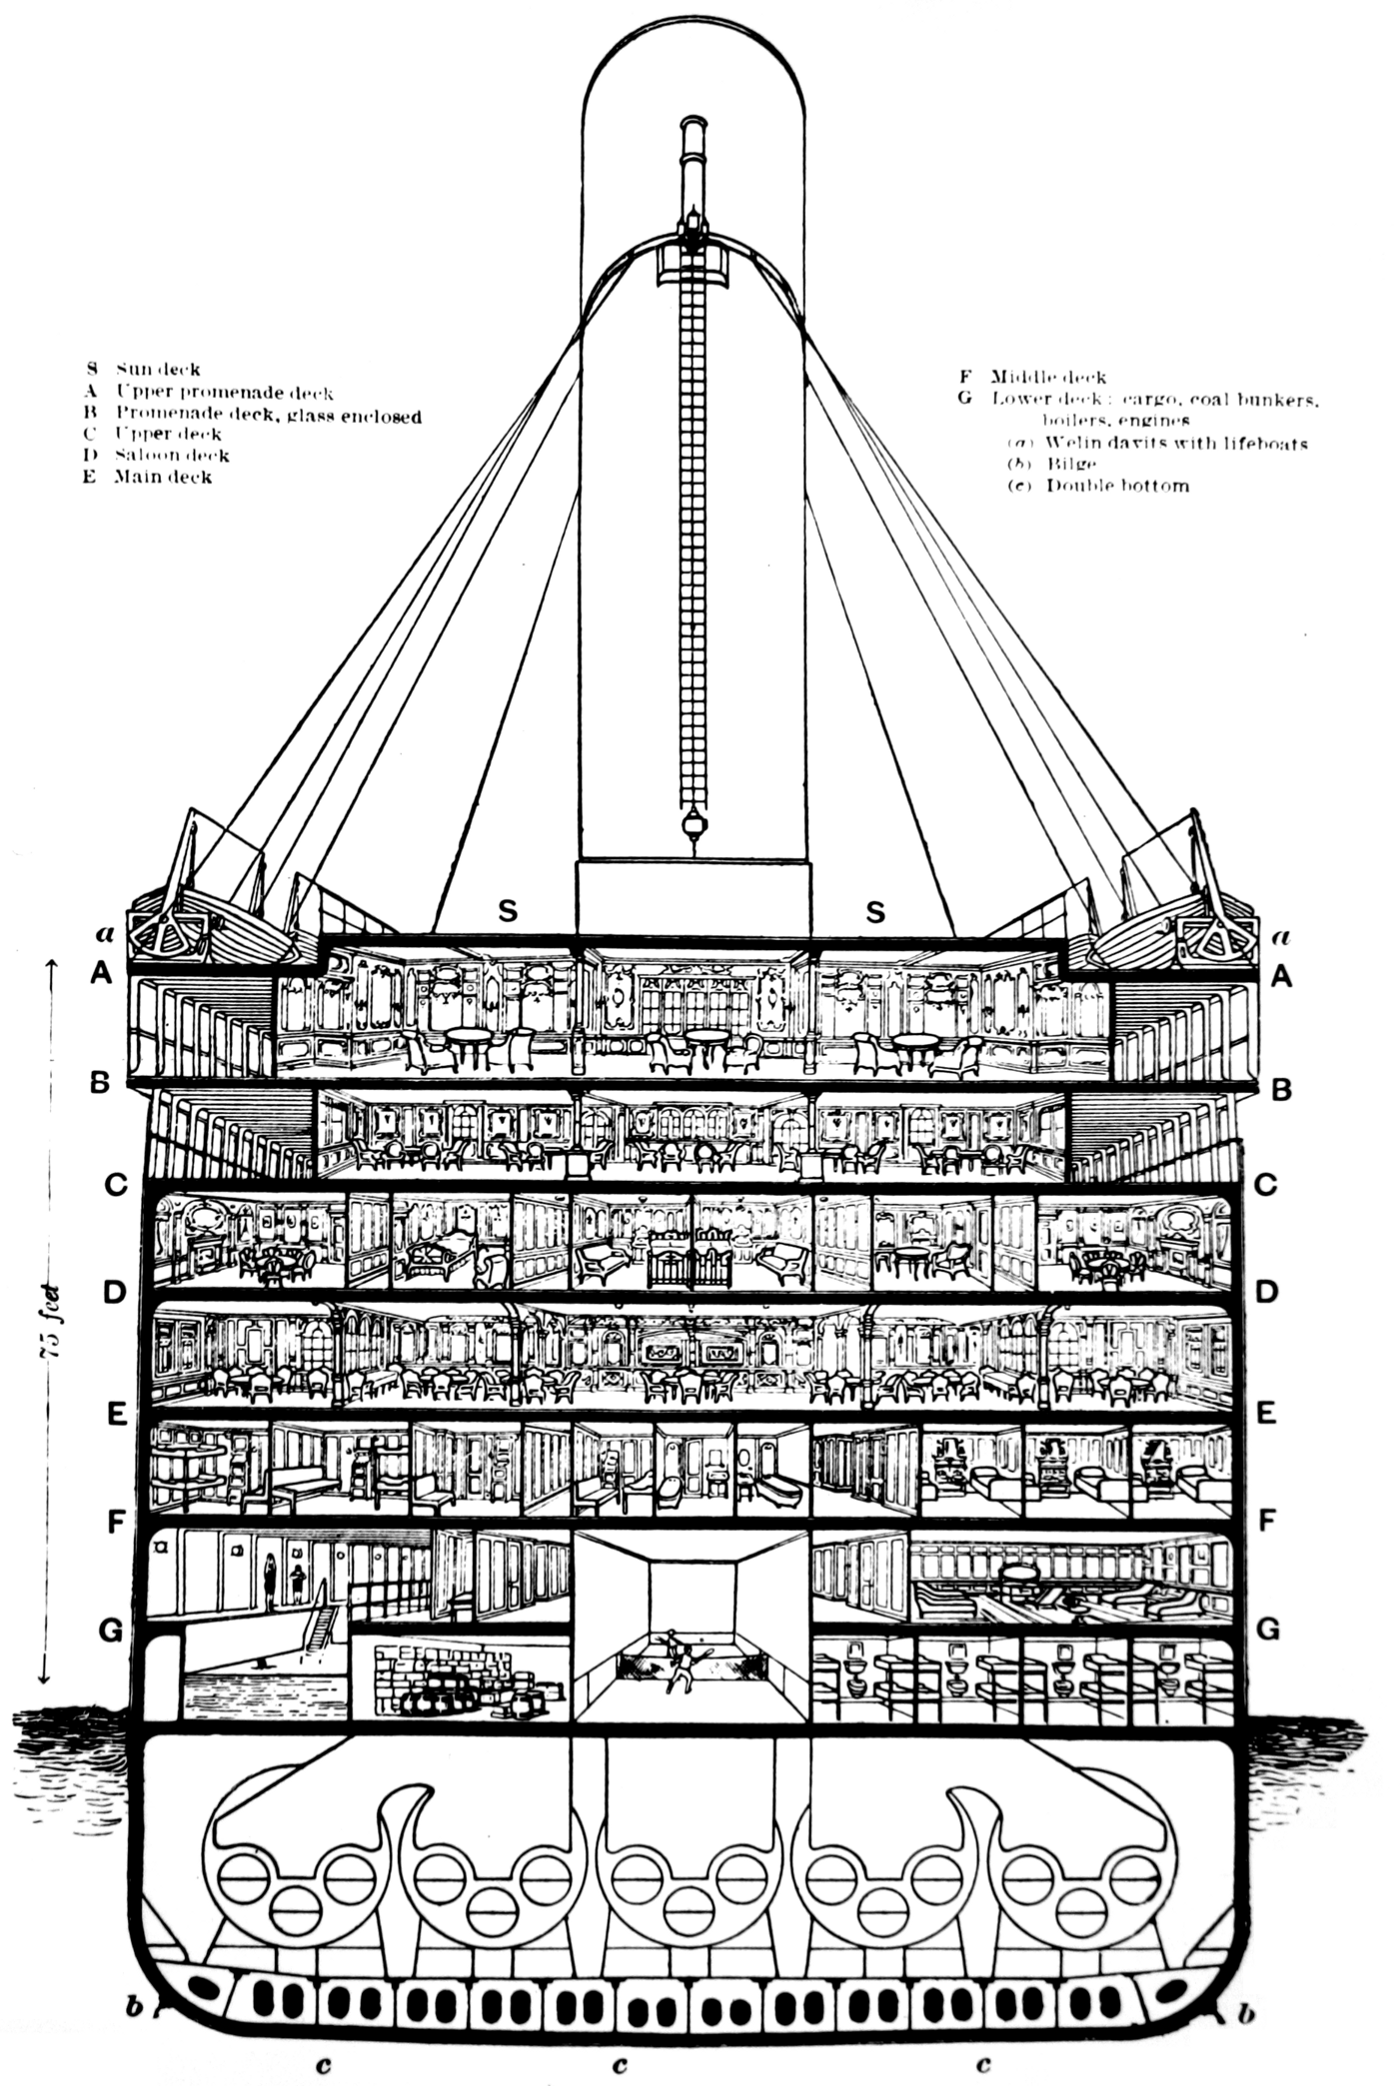

<h1 style="color: #FF8C00;">Feature Engineering </h1>

- It is the process of using domain knowledge to extract features from raw data. 
- These features can be used to improve the performance of machine learning algorithms. 
- Feature engineering can be thought of as applied machine learning itself.

<h2 style="color: #FF6347;">Feature Engineering: Titles</h2>

- The name could give us important information about the socioeconomic status of a passenger. 
- And depending on their socioeconomic status, they have been able to buy a more expensive or cheaper ticket, which indicates a cabin located in one place or another on the ship. 
- **We can answer** the question of whether or not someone is married or has a formal title and extract that information to generate a new variable.

- Major, Col, and Capt: These are military titles.
- Dr: This title indicates a person with a doctoral degree.
- Rev: This title refers to members of the clergy.
- Lady, Sir, the Countess, and Jonkheer: These are titles of nobility or honor.

In [ ]:
# binning by Miss
df["title"].replace("Mlle", "Miss", inplace=True)
df["title"].replace("Ms", "Miss", inplace=True)
df["title"].replace("Mme", "Miss", inplace=True)

# by Mr
df["title"].replace("Don", "Mr", inplace=True)

# binning by Military
df["title"].replace(["Major", "Col", "Capt"], "Military", inplace=True)

# binning by Nobility
df["title"].replace(["Lady", "Sir", "the Countess", "Jonkheer"], "Nobility", inplace=True)

In [ ]:
# droping name
# groubpy

<h2 style="color: #FF6347;">Some EDA... And also Imputation of Age</h2>

In [ ]:
df.isnull().sum()

In [ ]:
sns.histplot(data=df, x="age", hue='title')

In [ ]:
# Ma keys
df.groupby("title")["age"].mean().round(2).index

In [ ]:
# And ma values!
df.groupby("title")["age"].mean().round(2).values

In [ ]:
print(round(df.age.isna().sum() / len(df) * 100, 2))

In [ ]:
keys = df.groupby("title")["age"].mean().round(2).index
values = df.groupby("title")["age"].mean().round(2).values

mean_ages = {key: float(value) for key, value in zip(keys, values)}

In [ ]:
mean_ages

In [ ]:
age_by_title = df["title"].map(mean_ages)
df["age"] = df["age"].fillna(age_by_title)

In [ ]:
df.isna().sum()

<h2 style="color: #FF6347;">Categorical encoding</h2>

- Utilizing pd.get_dummies() allows for the transformation of categorical data into a binary format, creating additional columns for each category, which is ideal for nominal data without an inherent order. 
- On the other hand, Label Encoder assigns numerical values to categories, best used with care for ordinal data where the sequence of categories matters, as the assigned numbers can significantly impact model interpretation and performance.

In [ ]:
# broken code:
dict(df.cabin.value_counts())

In [ ]:
cabin_counts = {key: int(value) for key, value in df.cabin.value_counts().items()}

In [ ]:
cabin_counts

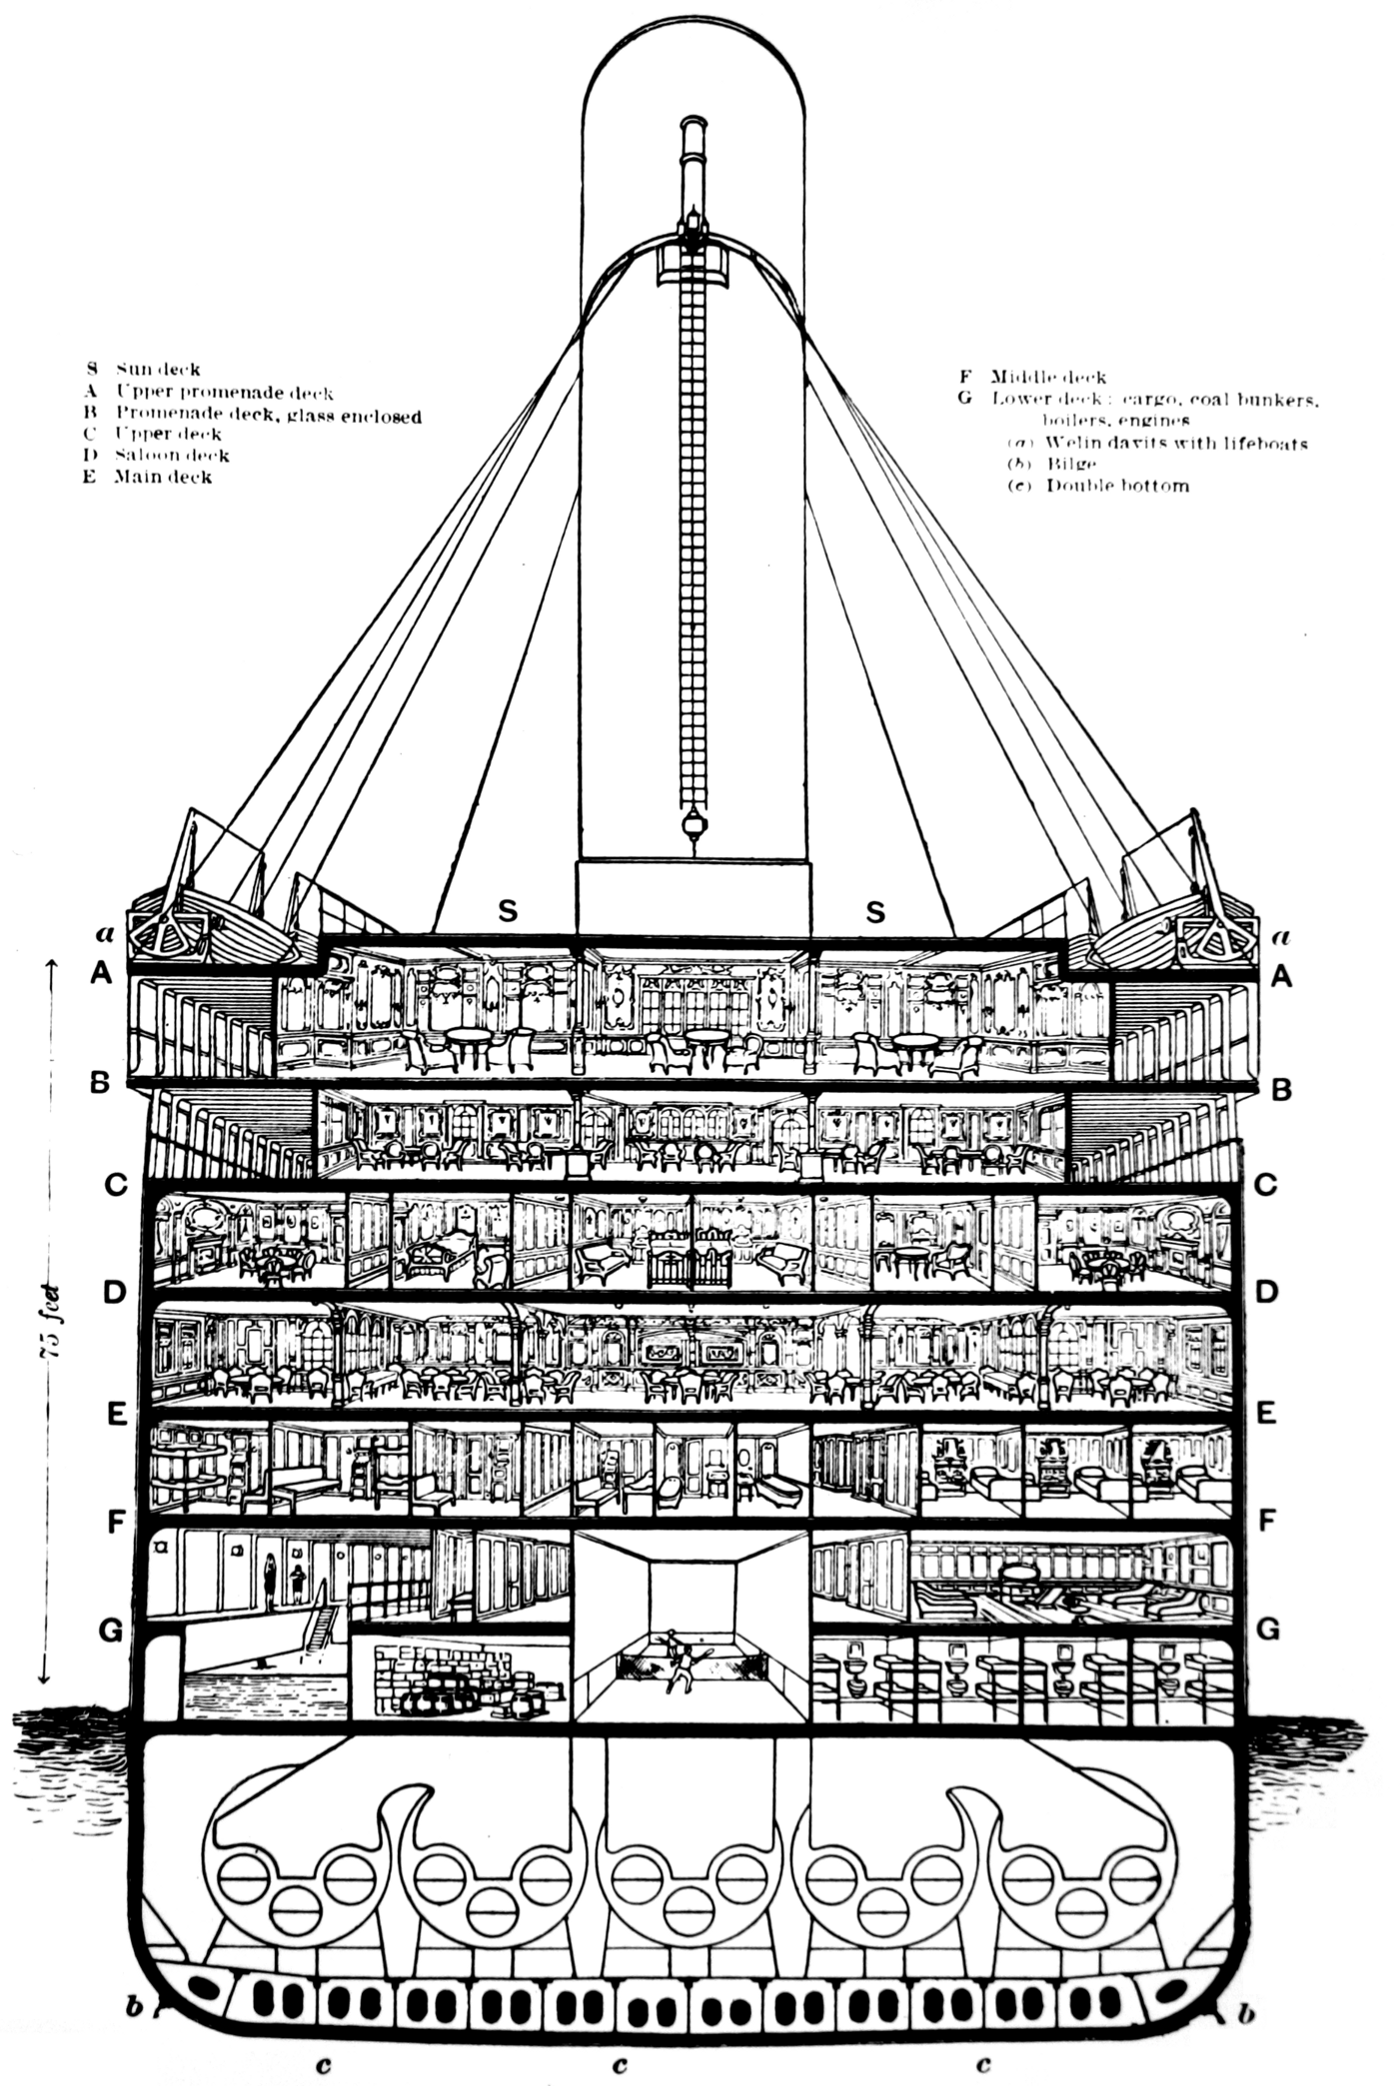

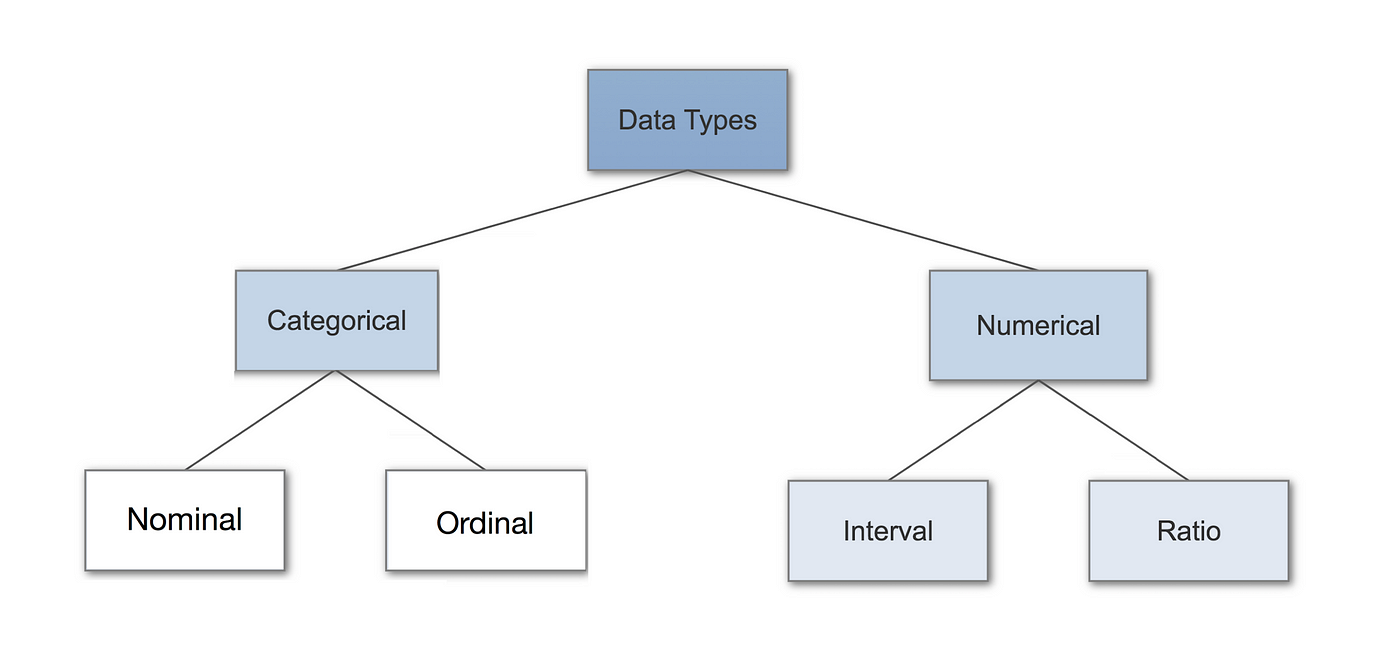

### So, for cabins we need to encode it as categorical ordinal data

In [ ]:
cabin_map = {'A': 1,
             'B': 2,
             'C': 3,
             'D': 4,
             'E': 5,
             'F': 6,
             'G': 7,
             'T': 8,
             'M': 9}

In [ ]:
df["cabin_enc"] = df["cabin"].map(cabin_map)
df = df.drop(columns=["cabin"])
df.head(2)

<h2 style="color: #FF6347;">Categorical encoding II</h2>

In [ ]:
# sex encoding

### One Hot Encoder: get dummies

Now, as we have already mentioned, depending on the data we have, we could find situations in which, after encoding the labels, we could confuse our model by making it believe that a column has data with some kind of order or hierarchy, when clearly we don't have it. To avoid this, we "OneHotEncode" that column.
What a hot encoding does is it takes a column that has categorical data, which has been encoded with labels, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has which value.

- **`Embarked`**: Port of Embarkation. Indicates where the passenger boarded the Titanic.
  - `C` = Cherbourg
  - `Q` = Queenstown
  - `S` = Southampton

In [ ]:
df.dtypes

In [ ]:
df.embarked.value_counts()

In [ ]:
embarked_dummies = pd.get_dummies(df["embarked"], prefix="embarked")

In [ ]:
embarked_dummies.head(2)

In [ ]:
df = pd.concat([df, embarked_dummies], axis=1)

In [ ]:
df.head(3)

In [ ]:
df = df.drop(columns="embarked")

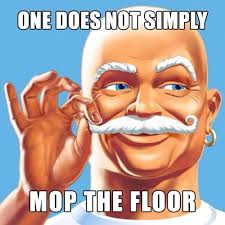

In [ ]:
df.isnull().sum()

In [ ]:
titles_dummies = pd.get_dummies(df["title"], prefix="title")
df = pd.concat([df, titles_dummies], axis=1)
df = df.drop(columns="title")

In [ ]:
df.head(3)

- **`Ticket`**: Ticket number. The format varies, and it might contain letters and numbers.

In [ ]:
# droping droping

## Fun Part Here

<h2 style="color: #FF6347;">Standardization Vs Normalization</h2>

Some algorithms, especially those based on distance calculations, will give more weight to features that show large changes in value, interpreting these features as artificially more important. For these algorithms, it is important that we scale our features, or that we scale features with naturally different scales, so that the features are used by the algorithm without artificial overweighting, and allow two features with different scales to be compared.

Algorithms that do not require normalization/scaling are rule-based. They would not be affected by any monotonic transformation of the variables. Scaling is a monotonic transformation.
Examples of algorithms in this category are all tree-based algorithms:
- CART
-Random Forests
-Gradient Boosted Decision Trees
These algorithms use rules (series of inequalities) and do not require normalization.

### Standardization
In standardization, we impose several statistical properties on the variable: the mean value is set to 0, and the standard deviation is set to 1. This is achieved by subtracting the mean from each feature value and dividing by the standard deviation. This is also sometimes called "z-score normalization."

Since we are enforcing this standard deviation, normalization reduces the effects of outliers on the feature. In addition, it allows comparing two characteristics with different scales or units. The different scales of the characteristics would be statistically reflected in differences in both the mean and the standard deviation. Standardizing these two numbers between features removes the influence of these scale differences.

Standardization is especially important in situations where we use algorithms that assume features in our data are distributed along a 'bell curve' or Gaussian distribution, such as linear and logistic regression.

### Normalization

In the other form of feature scaling, called normalization, the feature is rescaled to a range between 0 and 1, without any change to its original distribution within that range. Mathematically, this is achieved by subtracting the minimum feature value from each feature value, and dividing by the difference between the largest value and the smallest value.

Since we compute the normalized value using the maximum and minimum values ​​of the feature, this technique is sometimes called "min-max normalization."
Normalization is most useful in cases where your data has few outliers but highly variable ranges, you don't know how your data is distributed, or you know that it is not distributed on a bell (Gaussian) curve. It is generally applied with algorithms that make no assumptions about the distributions of the features.

### Which one to use?

You may be wondering when normalization should be used and when standardization. There is no definitive answer to this question. Usually, if your dataset isn't too big and you have time, you can try both and see which one suits your task better.
If you don't have time to run multiple experiments, as a general rule:

- Unsupervised learning algorithms, in practice, benefit more from standardization than normalization.
- Standardization is also preferable for a characteristic if the values ​​it takes are distributed close to a normal distribution (the so-called bell curve).
- Again, normalization is preferable for a feature if it can sometimes have extremely high or low values ​​(outliers); this is because the normalization will "squeeze" the normal values ​​into a very small range.
- In all other cases, normalization is preferable.

Feature rescaling is usually beneficial for most learning algorithms. However, modern implementations of learning algorithms, which can be found in popular libraries, are robust to features found in different ranges.

<h2 style="color: #FF6347;">X-Y Split</h2>

In [ ]:
X = df.drop("survived", axis=1)
y = df.survived

<h1 style="color: #FF8C00;">Modeling</h1>

<h2 style="color: #FF6347;">Train-Test Split</h2>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2 style="color: #FF6347;">Model Selection: Random Forest Classifier</h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

<h2 style="color: #FF6347;">Model Validation</h2>

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

<h2 style="color: #FF6347;">Feature Importance</h2>

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Hyperparameter Tuning</h2>

- Hyperparameters are tunable parameters that allow you to control the process of training a model. 
- For example, with neural networks, you can decide the number of hidden layers and the number of nodes in each layer. The performance of a model depends heavily on hyperparameters.
- Hyperparameter tuning, also called hyperparameter optimization, is the process of finding the hyperparameter configuration that produces the best performance. Typically, the process is manual and computationally expensive.

There are different techniques to choose this hyperparameter tuning:
    
#### - Random sampling
- Random sampling supports discrete and continuous hyperparameters. Supports early termination of underperforming strings. Some users perform an initial search with random sampling and then narrow the search space to improve results.
In random sampling, hyperparameter values ​​are randomly selected from the defined search space.

#### - Grid Sampling
- Grid sampling supports discrete hyperparameters. Use grid sampling if your budget allows you to search the search space exhaustively. Supports early termination of underperforming strings.

#### - Bayesian sampling
- Bayesian sampling is based on the Bayesian optimization algorithm. Pick the samples based on how the previous ones did, so that the new samples improve the main metric.
- For best results, it is recommended that the maximum number of runs be greater than or equal to 20 times the number of hyperparameters being optimized.
- The number of simultaneous series affects the efficiency of the adjustment process. Fewer concurrent runs can lead to better sampling convergence, since the lower degree of parallelism increases the number of runs that benefit from previously completed runs.
- We are going to look at grid hyperparameter tuning with GridSearchCV but I leave you to investigate Bayesian sampling with [HyperOpt](https://towardsdatascience.com/hyperopt-hyperparameter-tuning-based-on-bayesian-optimization-7fa32dffaf29)

### GridSearchCV by sklearn, say hello to your new friend!
And read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<h2 style="color: #FF6347;">GridSearchCV</h2>

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
X_train

In [ ]:
df.dtypes

In [ ]:
parameters = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [200, 400, 600]
}

In [ ]:
model = RandomForestClassifier()

In [ ]:
model = GridSearchCV(model, parameters)
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

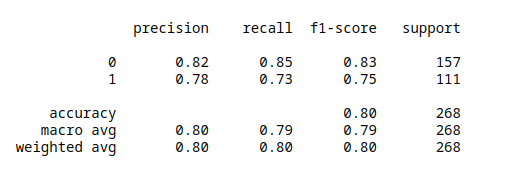

When performing a grid search in machine learning using `GridSearchCV`, the goal is to find the best parameters for a model that result in the highest performance score. Here's what these terms mean:

### Best Parametrization

- **Best Parametrization**: This refers to the set of parameters that gave the best results after the grid search has been completed. In the context of an SVM with a `C` parameter, it indicates the value of `C` that led to the best model performance. For example, if `GridSearchCV` returns `{'C': 1}`, it means that using `C=1` for the SVM resulted in the most accurate predictions during the cross-validation process.

### Achieved Score

- **Achieved Score**: After finding the best parametrization, `GridSearchCV` also provides the best score that was achieved with this parameter. This score is a number that reflects how well the model with the best parameters is performing. The specific meaning of the score depends on the scoring method used (e.g., accuracy, precision, recall, F1 score). For instance, if the score is `0.60212765`, and we are using accuracy as our scoring metric, it indicates that the model with the best parameter (`C=1`) was able to correctly predict the class labels for approximately 60.21% of the cross-validated dataset.

### Putting It All Together

The process of using `GridSearchCV` not only helps in tuning the model to find the best settings but also gives us an estimate of how well the model is likely to perform on unseen data. It's important to look at both the best parameters and the achieved score to understand the potential effectiveness of your model.


<h2 style="color: #FF6347;">Imbalance Data</h2>

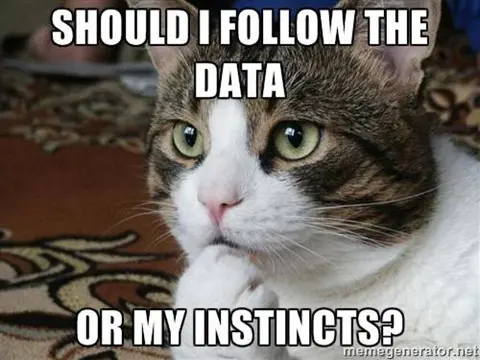

In [ ]:
df.survived.value_counts()

In [ ]:
count_classes = pd.value_counts(df['survived'])
count_classes.plot(kind = 'bar')

<h2 style="color: #FF6347;">Oversampling/Undersampling</h2>

In [ ]:
from sklearn.utils import resample

In [ ]:
train = pd.concat([X_train, y_train], axis=1)

In [ ]:
no_survived = train[train['survived']==0]
survived = train[train['survived']==1]

In [ ]:
display(no_survived.shape)
display(survived.shape)

In [ ]:
oversampled_survived = resample(survived,
                                replace=True,  # Sample with replacement
                                n_samples=len(no_survived),  # Match number in majority class
                                random_state=42)  # Reproducible results

In [ ]:
display(no_survived.shape)
display(oversampled_survived.shape)

In [ ]:
train_oversampled = pd.concat([no_survived,oversampled_survived])
train_oversampled.sample(10)

In [ ]:
X_train = train_oversampled.drop('survived',axis = 1).copy()
y_train = train_oversampled['survived'].copy()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

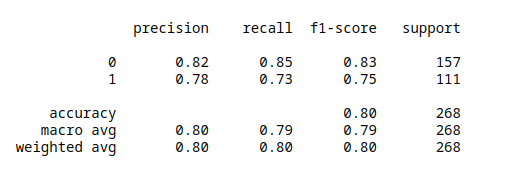

<h2 style="color: #FF6347;">Oversampling with SMOTE</h2>

> A bit of magic, you can find documentation here: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html. By default, takes a 5-neightbour KNN to build a new point:

In [ ]:
# Install the imblearn package
# %pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop("survived", axis=1)
y = df.survived

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [ ]:
y.value_counts()

In [ ]:
y_sm.value_counts()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

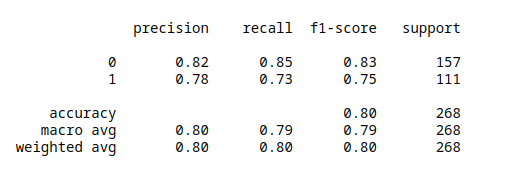

<h2 style="color: #FF6347;">Undersampling with TomekLinks</h2>

In [ ]:
from imblearn.under_sampling import TomekLinks # Undersampling librarie technique

In [ ]:
X = df.drop("survived", axis=1)
y = df.survived

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)

In [ ]:
y.value_counts()

In [ ]:
y_tl.value_counts()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

<h1 style="color: #FF6347;">Another Trick<h1>

In [ ]:
# again, librariesss!
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor # NEW!!!!
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
# Loading DATAaaaa!!
data = fetch_california_housing()
print(data)

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head(3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Lazy Predict

In [ ]:
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None) # Lazzzzyyy

models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

print(models.head(10))  # BEST 10 MODELS HEHE